In [144]:
%matplotlib inline

import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('seaborn')

In [145]:
def periodic_signal( freq , amp , func ):
    ts = np.arange( 0 , 0.3 , 1 / (50 * freq) )
    phases = 2 * np.pi * freq * ts 
    ys = amp * func( phases )
    return ts , ys

def sin_signal( freq , amp ):
    return periodic_signal( freq, amp, np.sin )
     
def cos_signal( freq , amp ):
    return periodic_signal( freq, amp, np.cos )

def step(x):
    return 1 * (x > 0)

def impulse(x):
    return 1 * (x == 0)

def plot( t , y ):
    
    fig = plt.figure()
    ax = fig.gca()
    ax.set_ylim((-2, 2))
    ax.grid(True)
    
    plt.plot( t , y )
    
def plot2( t , y1 , y2 ):
    fig = plt.figure()
    ax = fig.gca()
    ax.set_ylim((-5, 5))
    ax.grid(True)

    plt.plot( t , y1 , 'C1', label='C1' )
    plt.plot( t , y2 , 'C2', label='C2')
    plt.legend()
    
def stem( t , y1 ):
    fig = plt.figure()
    ax = fig.gca()

    ax.stem( t , y1 , markerfmt=" " )
    ax.grid(True)
    ax.set_ylim((-4, 4))
    
def stem2( t , y1 , y2 ):
    markerline, stemlines, baseline = plt.stem(t, y1, markerfmt='o', label='y1')
    plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
    plt.setp(stemlines, 'linestyle', 'dotted')

    markerline, stemlines, baseline = plt.stem(t, y2, markerfmt='o', label='y2')
    plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
    plt.setp(stemlines, 'linestyle', 'dotted')

    plt.legend()
    plt.show()

## Step Function (Heaviside)

$$\mathcal{H(x)} = \left\{
        \begin{array}{ll}
            0 & \quad x \leq 0 \\
            1 & \quad x > 0
        \end{array}
    \right.$$

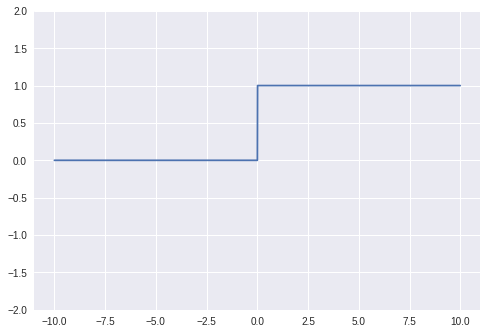

In [146]:


ts = np.arange(-10,10,0.01)
step_sig = step( ts )
plot( ts , step_sig )




## Impulse Function (Dirac)

$$\delta(x) = \left\{
        \begin{array}{ll}
            \infty & \quad x = 0 \\
            0 & \quad x \neq 0
        \end{array}
    \right.$$

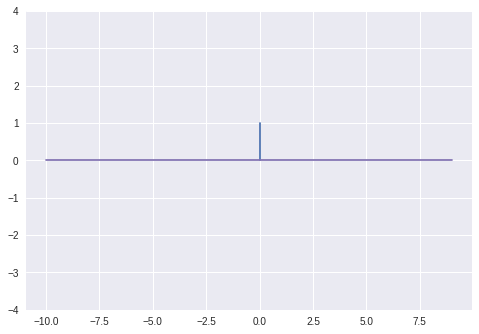

In [147]:

ts = np.arange(-10,10,1)
impulse_sig = impulse( ts )
stem( ts, impulse_sig )

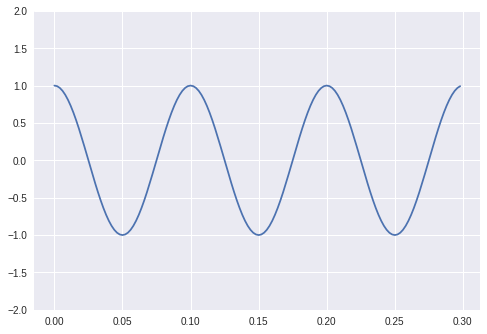

In [148]:
fig = plt.figure()
ts  ,cos_sig = cos_signal( 10 , 1 )
plot( ts, cos_sig )


## Scaling

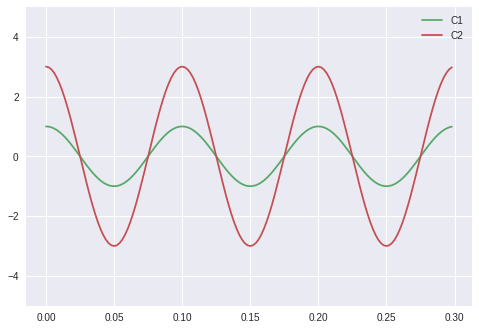

In [149]:
ts  ,cos_sig = cos_signal( 10 , 1 )
cos_sig_scaled = 3 * cos_sig 
plot2( ts, cos_sig , cos_sig_scaled )

## Time Shifting

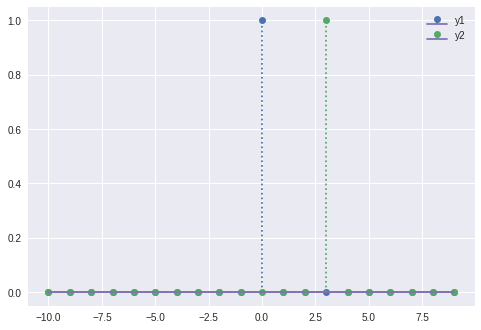

In [150]:
ts = np.arange(-10,10,1)
impulse_sig = impulse( ts )
impulse_sig_shifted = impulse( ts - 3 )
stem2( ts, impulse_sig , impulse_sig_shifted)